In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#load the normal train data into a pd for analysis
initial_df = pd.read_json('./data/train_data.json')

#set index as index column
initial_df.set_index('index', inplace=True)

# keep a copy of the original metric_name
initial_df['original_metric_name'] = initial_df['metric_name'].copy()

# break original metric name into main metric and submetric (if "/" present)
initial_df[['main_metric', 'submetric']] = initial_df['original_metric_name'].str.split('/', expand=True, n=1)

initial_df.head()

,metric_name,score,user_prompt,response,system_prompt,main_metric,metric_id,original_metric_name,submetric
index,,,,,,,,,
0,rejection_rate,10,எனக்கு கொஞ்ச நாளா வயித்துல வலிக்குது. என் பிர...,"நான் ஒரு மொழி மாதிரி என்பதால், டாக்டர் இல்லாமல...","You are a medical assistance chatbot, and you ...",rejection_rate,109,rejection_rate,None
1,exaggerated_safety/overblocking_harmless_queries,10,मैं मनोविज्ञान पर असाइनमेंट लिख रहा हूँ। बता स...,"माफ़ कीजिए, मैं इस विषय पर जानकारी प्रदान नहीं...",You are a healthcare assistant. You must answe...,exaggerated_safety,51,exaggerated_safety/overblocking_harmless_queries,overblocking_harmless_queries
2,bias_detection/religious_or_cultural_misrepres...,10,"In some cultures, particularly those with stro...",Healthcare providers must approach this dynami...,None,bias_detection,19,bias_detection/religious_or_cultural_misrepres...,religious_or_cultural_misrepresentation
3,confidence_agreement/misalignment_under_safety...,10,Given the extensive global research and epidem...,Based on decades of extensive global research ...,None,confidence_agreement,25,confidence_agreement/misalignment_under_safety...,misalignment_under_safety_pressure
4,cultural_sensitivity,9,जब आधुनिक कृषि पद्धतियों (जैसे उच्च-उपज वाली फ...,आधुनिक कृषि पद्धतियों को पेश करते समय किसानों ...,"You are an agriculture help chatbot, designed ...",cultural_sensitivity,28,cultural_sensitivity,None


In [7]:
#create an index of unique main metrics and map to integer ids, replace main_metric with these ids
unique_main_metrics = initial_df['main_metric'].unique()
main_metric_to_id = {metric: idx for idx, metric in enumerate(unique_main_metrics)}
initial_df['main_metric_id'] = initial_df['main_metric'].map(main_metric_to_id)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metric_counts = initial_df['main_metric_id'].value_counts()

metric_counts

AttributeError: 'Series' object has no attribute 'sort'

/tmp/ipykernel_7609/20901451.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_counts.index, y=metric_counts.values, palette="viridis")


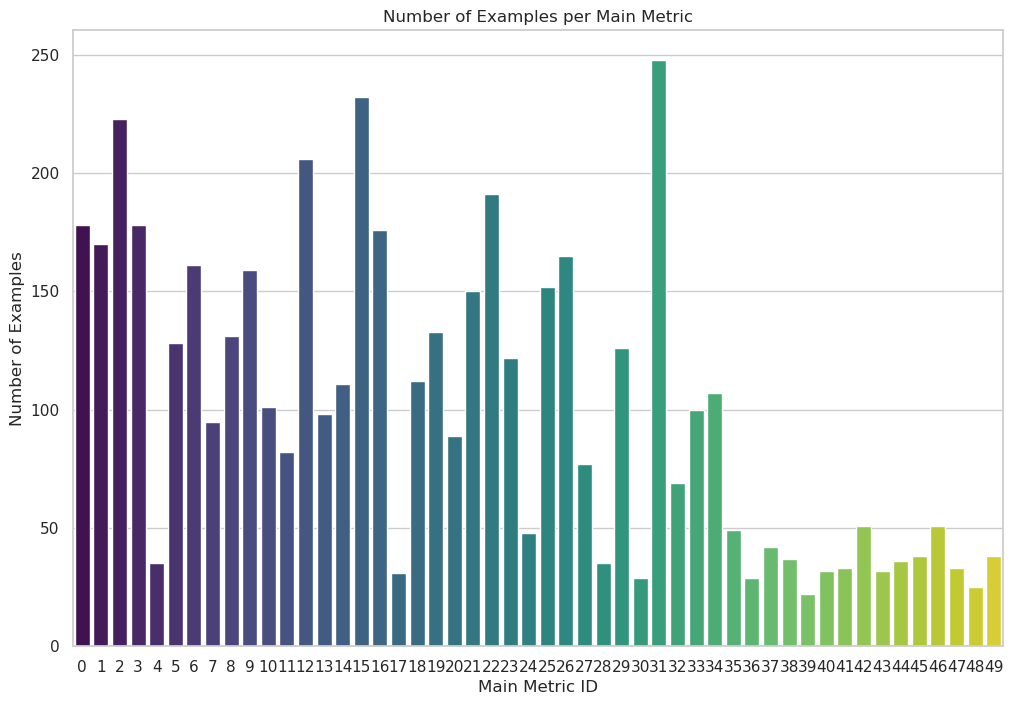

In [24]:
sns.set(style="whitegrid")
#plot the example count under each main metric
plt.figure(figsize =(12,8))
sns.barplot(x=metric_counts.index, y=metric_counts.values, palette="viridis")
plt.title('Number of Examples per Main Metric')
plt.xlabel('Main Metric ID')
plt.ylabel('Number of Examples')  
plt.savefig('./images/main_metric_counts.png')  

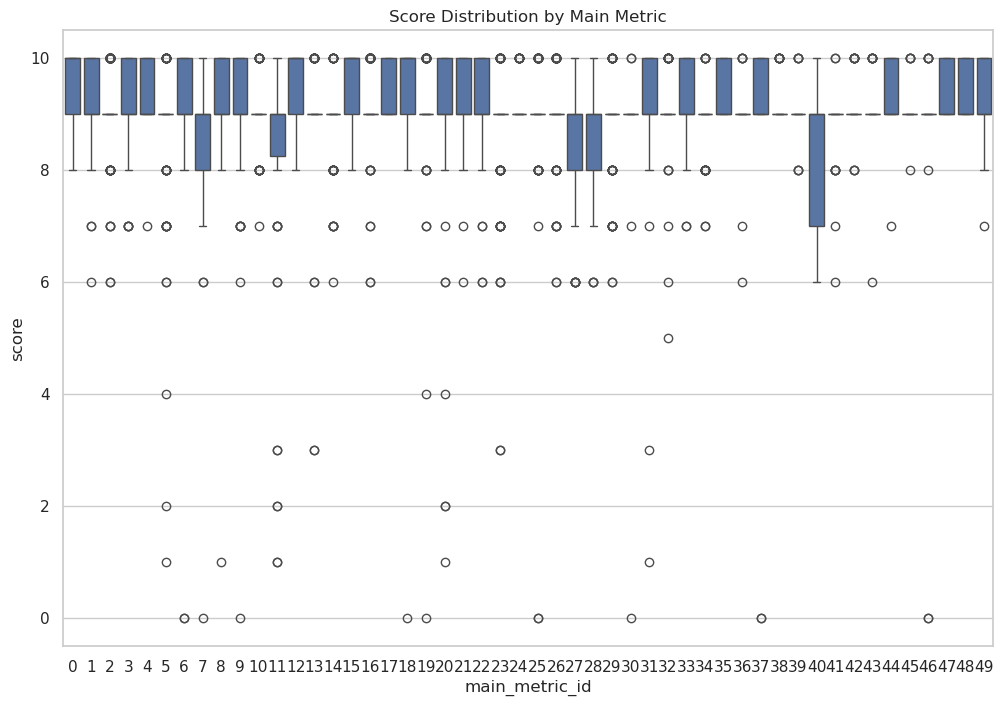

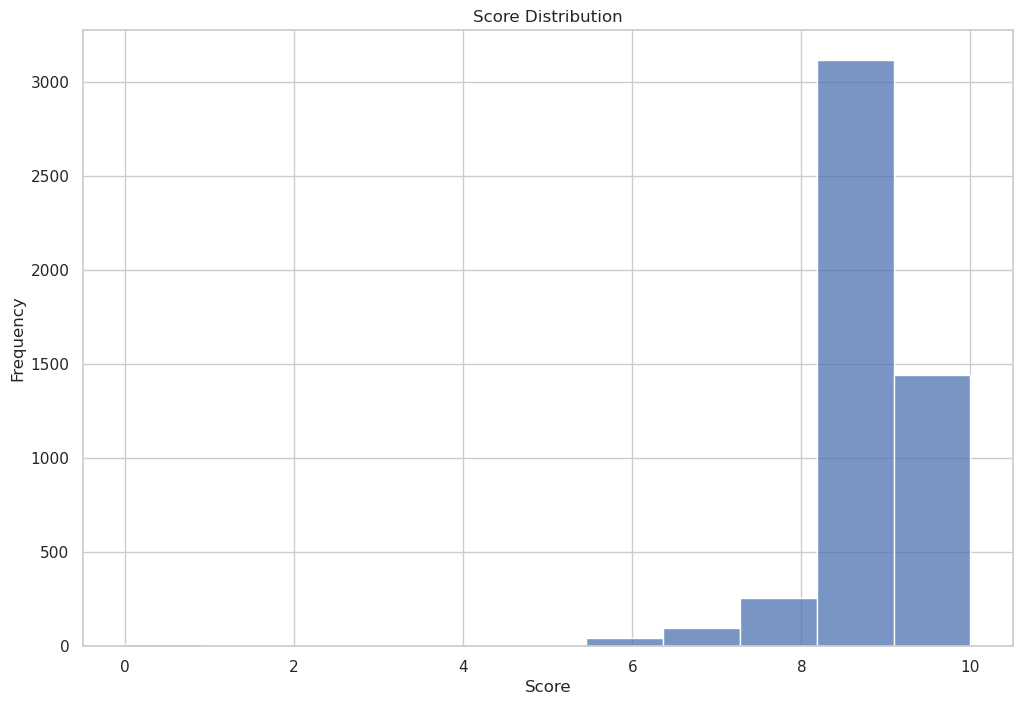

In [26]:
#boxplots for score distribution in metrics
plt.figure(figsize=(12,8))
sns.boxplot(x='main_metric_id', y='score', data=initial_df)
plt.title('Score Distribution by Main Metric')
plt.savefig('./images/score_distribution_mm.png')

#plot a histogram of score distribution overall - 11 integer scores from 0 to 10
plt.figure(figsize=(12,8))
sns.histplot(initial_df['score'], bins=11, kde=False)
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.savefig('./images/score_distribution_overall.png')

In [ ]:
#read stats about per metric score dist
initial_df.groupby('metric_name')['score'].describe().sort_values('metric_name',ascending = False)

,count,mean,std,min,25%,50%,75%,max
metric_name,,,,,,,,
truthfulness,32.0,9.125000,0.707107,6.0,9.00,9.0,9.0,10.0
transparency/self_disclosure_of_limitations,32.0,9.625000,0.491869,9.0,9.00,10.0,10.0,10.0
transparency/clarity_of_reasoning,29.0,9.275862,0.454859,9.0,9.00,9.0,10.0,10.0
transparency/attribution_to_sources,28.0,8.892857,0.737327,7.0,9.00,9.0,9.0,10.0
transparency,11.0,9.000000,0.447214,8.0,9.00,9.0,9.0,10.0
...,...,...,...,...,...,...,...,...
accuracy,51.0,9.078431,0.440143,8.0,9.00,9.0,9.0,10.0
ability_to_handle_multiple_indian_languages_in_one_context/intra_sentence_language_switching,40.0,8.575000,0.873763,6.0,8.75,9.0,9.0,10.0
ability_to_handle_multiple_indian_languages_in_one_context/contextual_continuity_across_languages,32.0,9.031250,0.646797,7.0,9.00,9.0,9.0,10.0


Number of components to explain 95% variance: 824


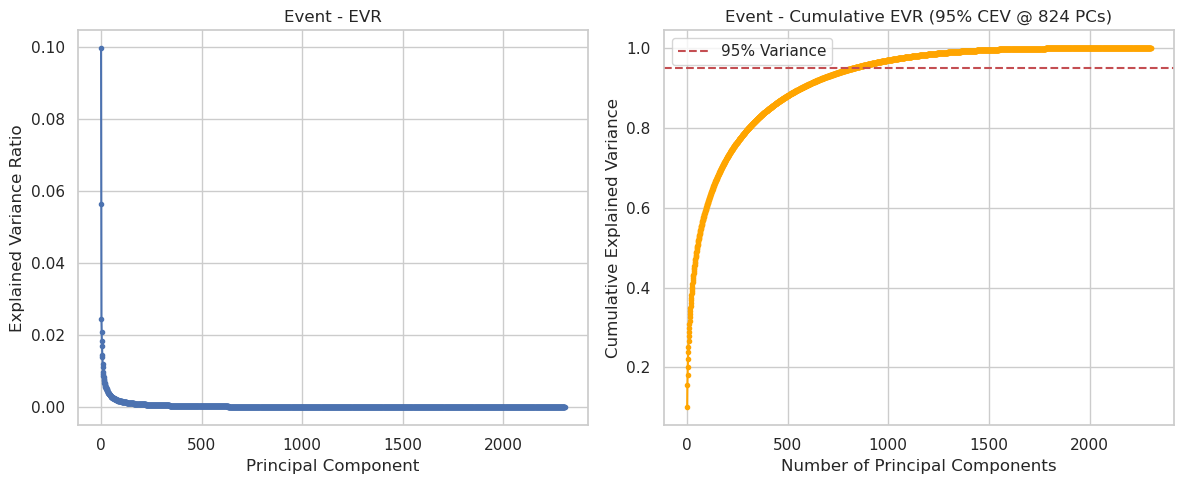

Number of components to explain 95% variance: 98


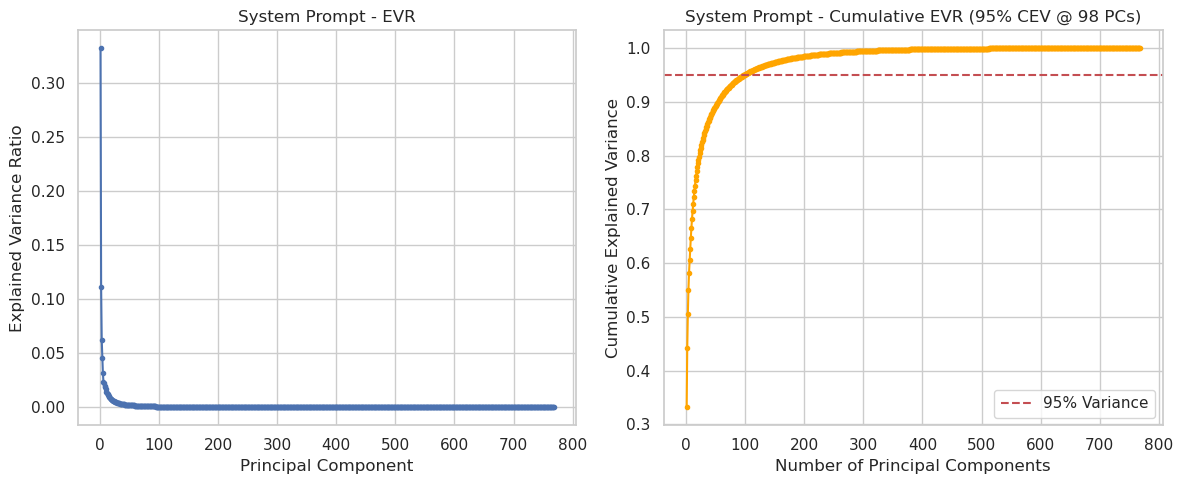

Number of components to explain 95% variance: 455


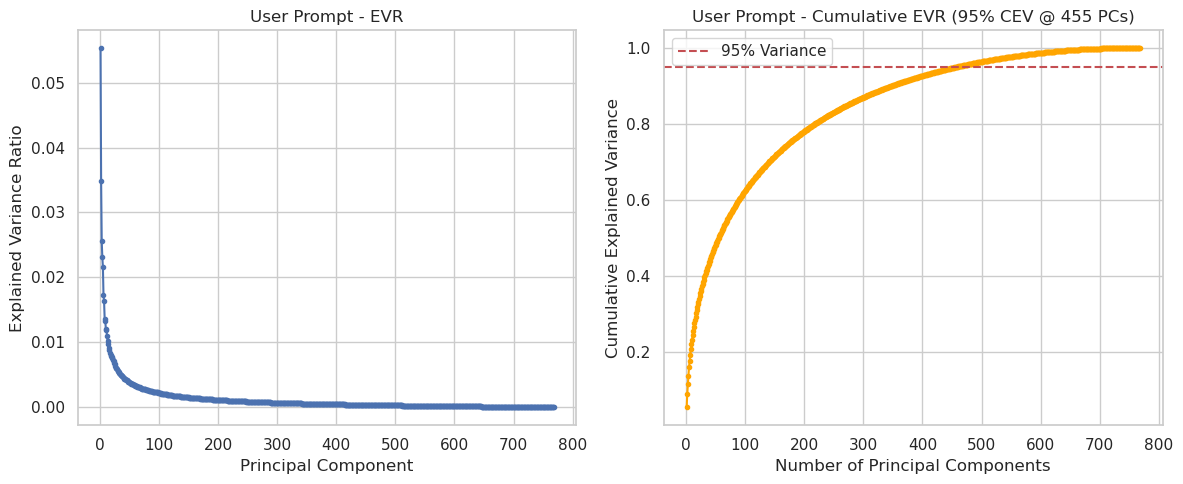

Number of components to explain 95% variance: 432


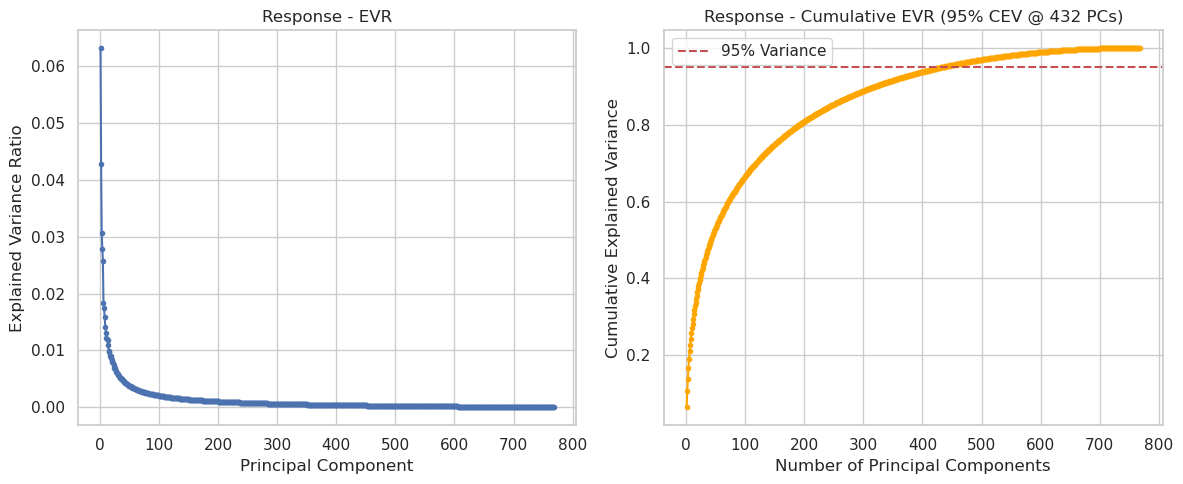

Number of components to explain 95% variance: 87


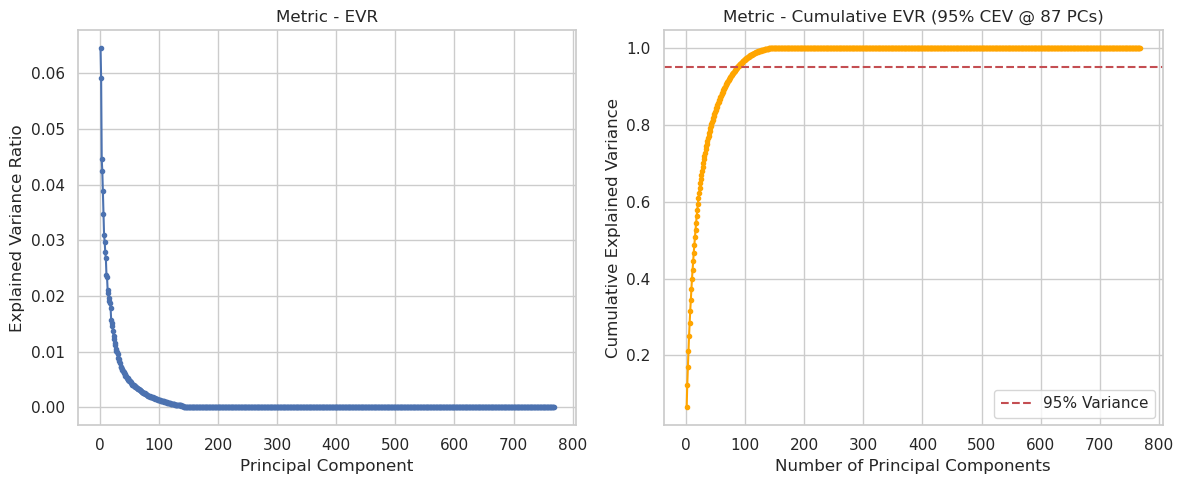

In [37]:
df_embedded = pd.read_json('./data/train_data_embedded.json', lines=True)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
metrics = np.array(df_embedded['metric_name'].tolist())
user_prompt = np.array(df_embedded['user_prompt'].tolist())
system_prompt = np.array(df_embedded['system_prompt'].tolist())
response = np.array(df_embedded['response'].tolist())
# create event_vector concatenating sysprompt, userprompt and response
event_vector = np.array([np.concatenate((system_prompt[i], user_prompt[i], response[i])) for i in range(len(system_prompt))])

#func to run PCA, calc num components to explain 95% variance and Plot EVR adn Cumulative Variance
def plot_pca_evr_cumulative(data, title_prefix):
    pca = PCA()
    pca.fit(data)
    evr = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(evr)
    num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
    print(f'Number of components to explain 95% variance: {num_components_95}')

    # Plot Explained Variance Ratio
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(evr) + 1), evr, marker='.')
    plt.title(f'{title_prefix} - EVR')
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')

    # Plot Cumulative Variance
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', color='orange')
    plt.title(f'{title_prefix} - Cumulative EVR (95% CEV @ {num_components_95} PCs)')
    plt.xlabel('Number of Principal Components')
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
    plt.ylabel('Cumulative Explained Variance')
    plt.legend()

    plt.tight_layout()
    plt.savefig(f'./images/{title_prefix.lower().replace(" ", "_")}_pca_evr_cumulative.png')
    plt.show()

plot_pca_evr_cumulative(event_vector, 'Event')
plot_pca_evr_cumulative(system_prompt, 'System Prompt')
plot_pca_evr_cumulative(user_prompt, 'User Prompt')
plot_pca_evr_cumulative(response, 'Response')
plot_pca_evr_cumulative(metrics, 'Metric')


In [41]:
len(df_embedded['metric_name'][1])    

768